## 2023 전력수요 데이터

한국전력거래소 정보공시 데이터
https://www.kpx.or.kr/menu.es?mid=a10107020000

- 20, 21, 22, 23년도(4월까지)_5분 단위 수급 현황

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
power_df = pd.read_csv('./data/2023년 5분 단위 수급현황.csv', encoding='cp949')

In [3]:
power_df.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2023-01-01 00:00,100409.50,65887.60,68000,34519.57,52.38975,9464.04,14.36340
1,2023-01-01 00:05,100161.85,65527.76,68700,34631.88,52.84891,9914.91,15.13034
2,2023-01-01 00:10,100165.02,65308.25,68700,34854.55,53.36748,9710.28,14.86788
3,2023-01-01 00:15,100135.28,65058.00,68700,35075.12,53.91183,10331.51,15.87994
4,2023-01-01 00:20,100126.41,64919.69,68700,35204.31,54.22547,10102.51,15.56098


In [4]:
power_df.tail()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
34536,2023-04-30 23:35,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
34537,2023-04-30 23:40,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
34538,2023-04-30 23:45,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829
34539,2023-04-30 23:50,76077.47,52679.85,57300,23397.62,44.41474,9303.84,17.66110
34540,2023-04-30 23:55,76072.29,52671.04,57300,23401.25,44.42906,9508.00,18.05166


In [5]:
len(power_df)

34541

### 각 열별로 결측값 확인

In [6]:
power_df.isna().sum()

기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

In [7]:
# '기준일시' 열을 datetime 형식으로 변환
power_df['기준일시'] = pd.to_datetime(power_df['기준일시'])

# '기준일시' 열에서 년-월-일 형식의 'date' 열을 생성
power_df['date'] = power_df['기준일시'].dt.strftime('%Y-%m-%d')

# '년', '월', '일', '시간' 열을 생성
power_df['year'] = power_df['기준일시'].dt.year
power_df['month'] = power_df['기준일시'].dt.month
power_df['day'] = power_df['기준일시'].dt.day
power_df['hour'] = power_df['기준일시'].dt.hour  #시
power_df['time'] = power_df['기준일시'].dt.time  #시-분-초

power_df.head()

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),date,year,month,day,hour,time
0,2023-01-01 00:00:00,100409.50,65887.60,68000,34519.57,52.38975,9464.04,14.36340,2023-01-01,2023,1,1,0,00:00:00
1,2023-01-01 00:05:00,100161.85,65527.76,68700,34631.88,52.84891,9914.91,15.13034,2023-01-01,2023,1,1,0,00:05:00
2,2023-01-01 00:10:00,100165.02,65308.25,68700,34854.55,53.36748,9710.28,14.86788,2023-01-01,2023,1,1,0,00:10:00
3,2023-01-01 00:15:00,100135.28,65058.00,68700,35075.12,53.91183,10331.51,15.87994,2023-01-01,2023,1,1,0,00:15:00
4,2023-01-01 00:20:00,100126.41,64919.69,68700,35204.31,54.22547,10102.51,15.56098,2023-01-01,2023,1,1,0,00:20:00


### '현재 수요' 분포

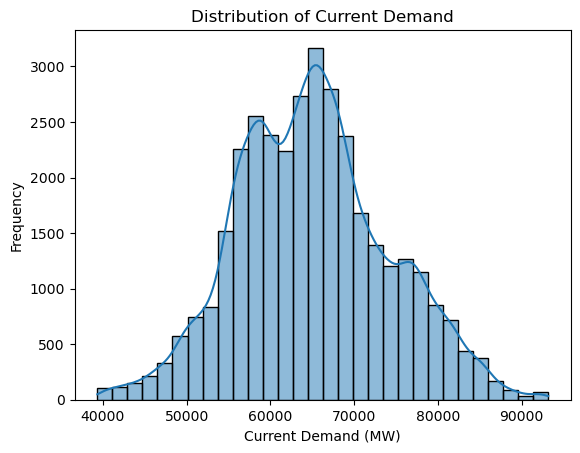

In [10]:
plt.figure()
sns.histplot(power_df['현재수요(MW)'],bins=30,kde=True)
plt.title('Distribution of Current Demand')
plt.xlabel('Current Demand (MW)')
plt.ylabel('Frequency')
plt.show()

### 기준일시 - 현재 수요

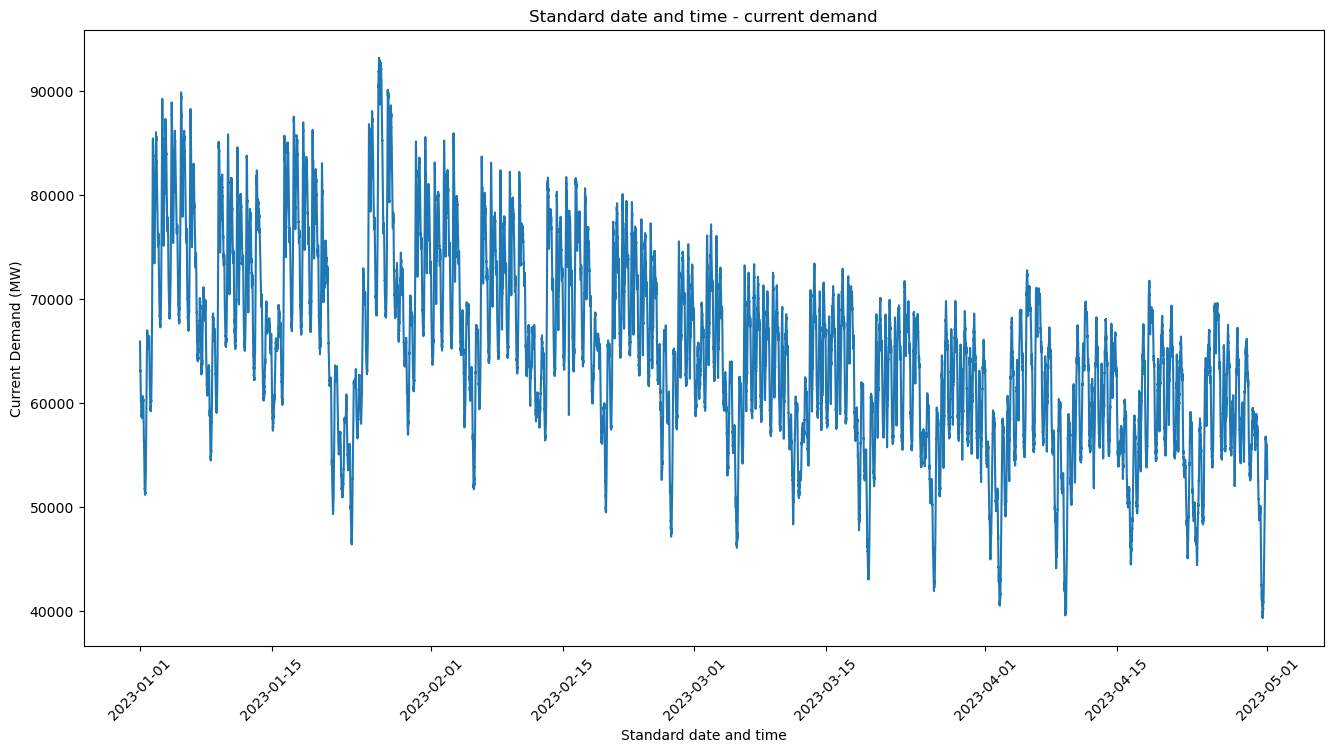

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='기준일시', y='현재수요(MW)', data=power_df)
plt.title('Standard date and time - current demand')
plt.xlabel('Standard date and time')  # 기준일시
plt.ylabel('Current Demand (MW)')
plt.xticks(rotation=45)  
plt.show()

### 시간대별 '현재 수요' 평균

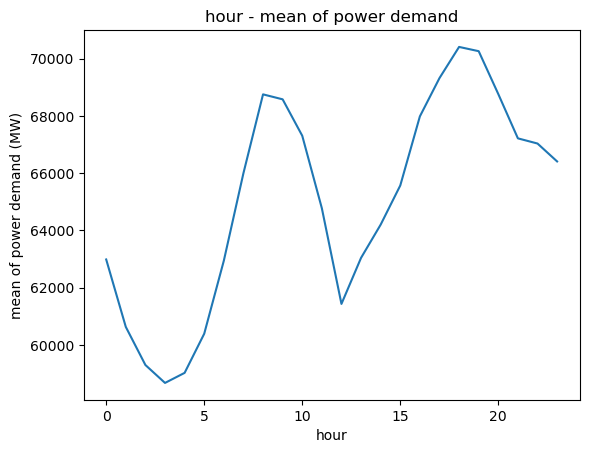

최대 전력 수요를 갖는 시간대: 18.0
해당 월의 평균 전력 수요: 70407.87546212648 MW
최소 전력 수요를 갖는 시간대: 3.0
해당 시간대의 평균 전력 수요: 58675.70604166667 MW


In [12]:
hourly_mean_power_demand = power_df.groupby('hour')['현재수요(MW)'].mean().reset_index()

plt.figure()
sns.lineplot(x='hour', y='현재수요(MW)', data=hourly_mean_power_demand)
plt.title('hour - mean of power demand')
plt.xlabel('hour')
plt.ylabel('mean of power demand (MW)')
plt.show()

max_demand_hour_row = hourly_mean_power_demand.loc[hourly_mean_power_demand['현재수요(MW)'].idxmax()]
max_demand_hour = max_demand_hour_row['hour']
max_demand_value = max_demand_hour_row['현재수요(MW)']

print("최대 전력 수요를 갖는 시간대:", max_demand_hour)
print("해당 월의 평균 전력 수요:", max_demand_value, "MW")

min_demand_hour_row = hourly_mean_power_demand.loc[hourly_mean_power_demand['현재수요(MW)'].idxmin()]
min_demand_hour = min_demand_hour_row['hour']
min_demand_value = min_demand_hour_row['현재수요(MW)']

print("최소 전력 수요를 갖는 시간대:", min_demand_hour)
print("해당 시간대의 평균 전력 수요:", min_demand_value, "MW")

### 월별 '현재 수요' 평균

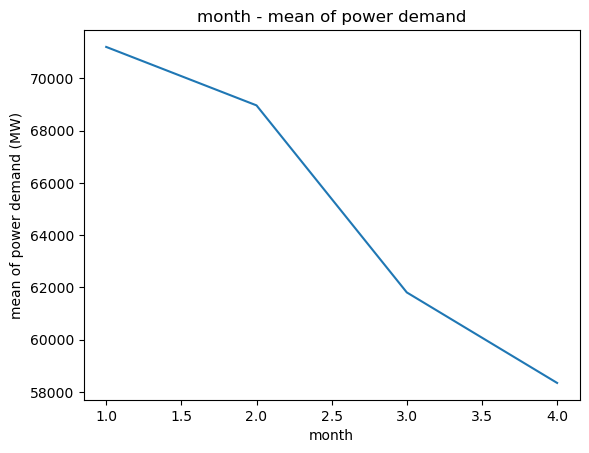

최대 전력 수요를 갖는 월: 1.0
해당 월의 평균 전력 수요: 71203.33630181492 MW
최소 전력 수요를 갖는 월: 4.0
해당 월의 평균 전력 수요: 58345.73400185486 MW


In [13]:
monthly_mean_power_demand = power_df.groupby('month')['현재수요(MW)'].mean().reset_index()

plt.figure()
sns.lineplot(x='month', y='현재수요(MW)', data=monthly_mean_power_demand)
plt.title('month - mean of power demand')
plt.xlabel('month')
plt.ylabel('mean of power demand (MW)')
plt.show()

max_demand_month_row = monthly_mean_power_demand.loc[monthly_mean_power_demand['현재수요(MW)'].idxmax()]
max_demand_month = max_demand_month_row['month']
max_demand_value = max_demand_month_row['현재수요(MW)']

print("최대 전력 수요를 갖는 월:", max_demand_month)
print("해당 월의 평균 전력 수요:", max_demand_value, "MW")

min_demand_month_row = monthly_mean_power_demand.loc[monthly_mean_power_demand['현재수요(MW)'].idxmin()]
min_demand_month = min_demand_month_row['month']
min_demand_value = min_demand_month_row['현재수요(MW)']

print("최소 전력 수요를 갖는 월:", min_demand_month)
print("해당 월의 평균 전력 수요:", min_demand_value, "MW")

### 요일별 '현재 수요' 평균

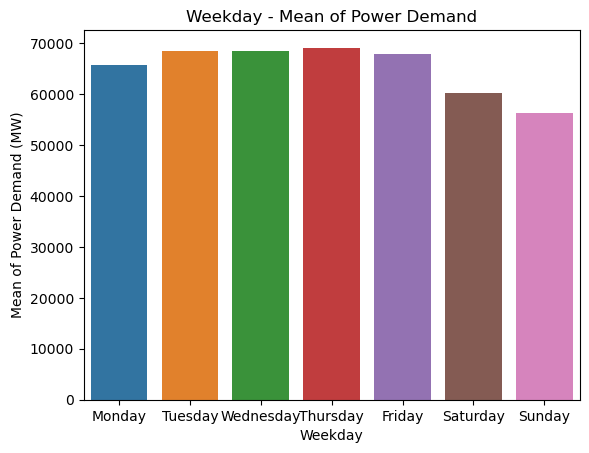

최대 전력을 쓰는 요일: Thursday, 평균 전력 수요: 69070.42103575077 MW
최소 전력을 쓰는 요일: Sunday, 평균 전력 수요: 56218.79515057915 MW


In [18]:
# '기준일시' 열에서 요일 정보 추출
power_df['weekday'] = power_df['기준일시'].dt.day_name()

# 요일별 평균 현재수요 계산
weekday_mean_power_demand = power_df.groupby('weekday')['현재수요(MW)'].mean().reset_index()

# 그래프 그리기
plt.figure()
sns.barplot(x='weekday', y='현재수요(MW)', data=weekday_mean_power_demand, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday - Mean of Power Demand')
plt.xlabel('Weekday')
plt.ylabel('Mean of Power Demand (MW)')
plt.show()

# 최대 전력을 쓰는 요일
max_demand_day = weekday_mean_power_demand.loc[weekday_mean_power_demand['현재수요(MW)'].idxmax(), 'weekday']
max_demand_value = weekday_mean_power_demand['현재수요(MW)'].max()

# 최소 전력을 쓰는 요일
min_demand_day = weekday_mean_power_demand.loc[weekday_mean_power_demand['현재수요(MW)'].idxmin(), 'weekday']
min_demand_value = weekday_mean_power_demand['현재수요(MW)'].min()

# 결과 출력
print(f"최대 전력을 쓰는 요일: {max_demand_day}, 평균 전력 수요: {max_demand_value} MW")
print(f"최소 전력을 쓰는 요일: {min_demand_day}, 평균 전력 수요: {min_demand_value} MW")

### 연중 각 날짜의 평균 전력 수요

- 1월 1일이 1, 12월 31일이 365(혹은 윤년일 경우 366)로 표시

In [15]:
power_df['day_of_year'] = power_df['기준일시'].dt.dayofyear
mean_power_by_day_of_year = power_df.groupby('day_of_year')['현재수요(MW)'].mean()

print(mean_power_by_day_of_year)

day_of_year
1      60098.022265
2      74347.066864
3      78143.688056
4      78169.635486
5      78595.043889
           ...     
116    60705.126076
117    59471.658264
118    59816.462257
119    56521.072535
120    48285.456597
Name: 현재수요(MW), Length: 120, dtype: float64


 ### '현재수요(MW)' 열 기준 Boxplot

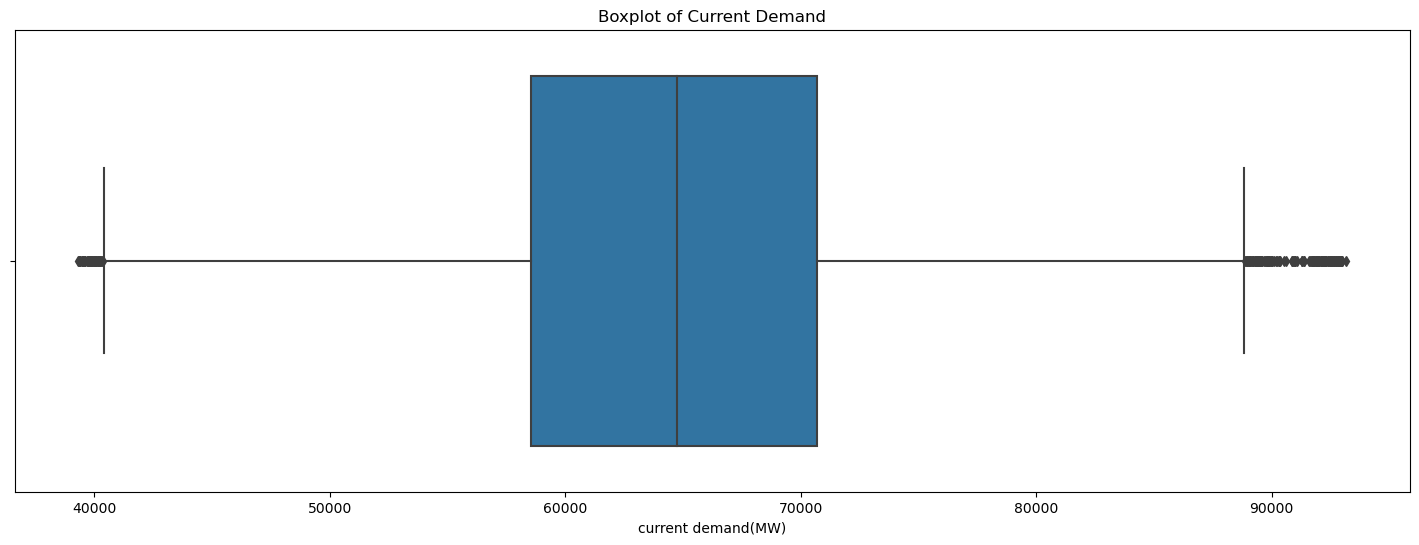

Q3 + IQR: 82795.69
현재수요(MW)가 Q3 + IQR 보다 큰 값의 개수: 1049


In [16]:
plt.figure(figsize=(18, 6))
boxplot = sns.boxplot(x='현재수요(MW)', data=power_df, showfliers=True)
plt.title('Boxplot of Current Demand')
plt.xlabel('current demand(MW)')
plt.show()

# Q3 및 IQR 값 구하기
Q3 = power_df['현재수요(MW)'].quantile(0.75) 
Q1 = power_df['현재수요(MW)'].quantile(0.25) 
IQR = Q3 - Q1 

# Q3 + IQR 값 출력
Q3_plus_IQR = Q3 + IQR
print("Q3 + IQR:", Q3_plus_IQR)
      
count_above_threshold = power_df[power_df['현재수요(MW)'] > Q3_plus_IQR]['현재수요(MW)'].count()

print("현재수요(MW)가 Q3 + IQR 보다 큰 값의 개수:", count_above_threshold)

In [17]:
power_df['현재수요(MW)'].quantile(q=[0.25,0.5,0.75])

0.25    58558.75
0.50    64764.15
0.75    70677.22
Name: 현재수요(MW), dtype: float64